<a href="https://colab.research.google.com/github/njafarov/Optimization_LP/blob/main/Callenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

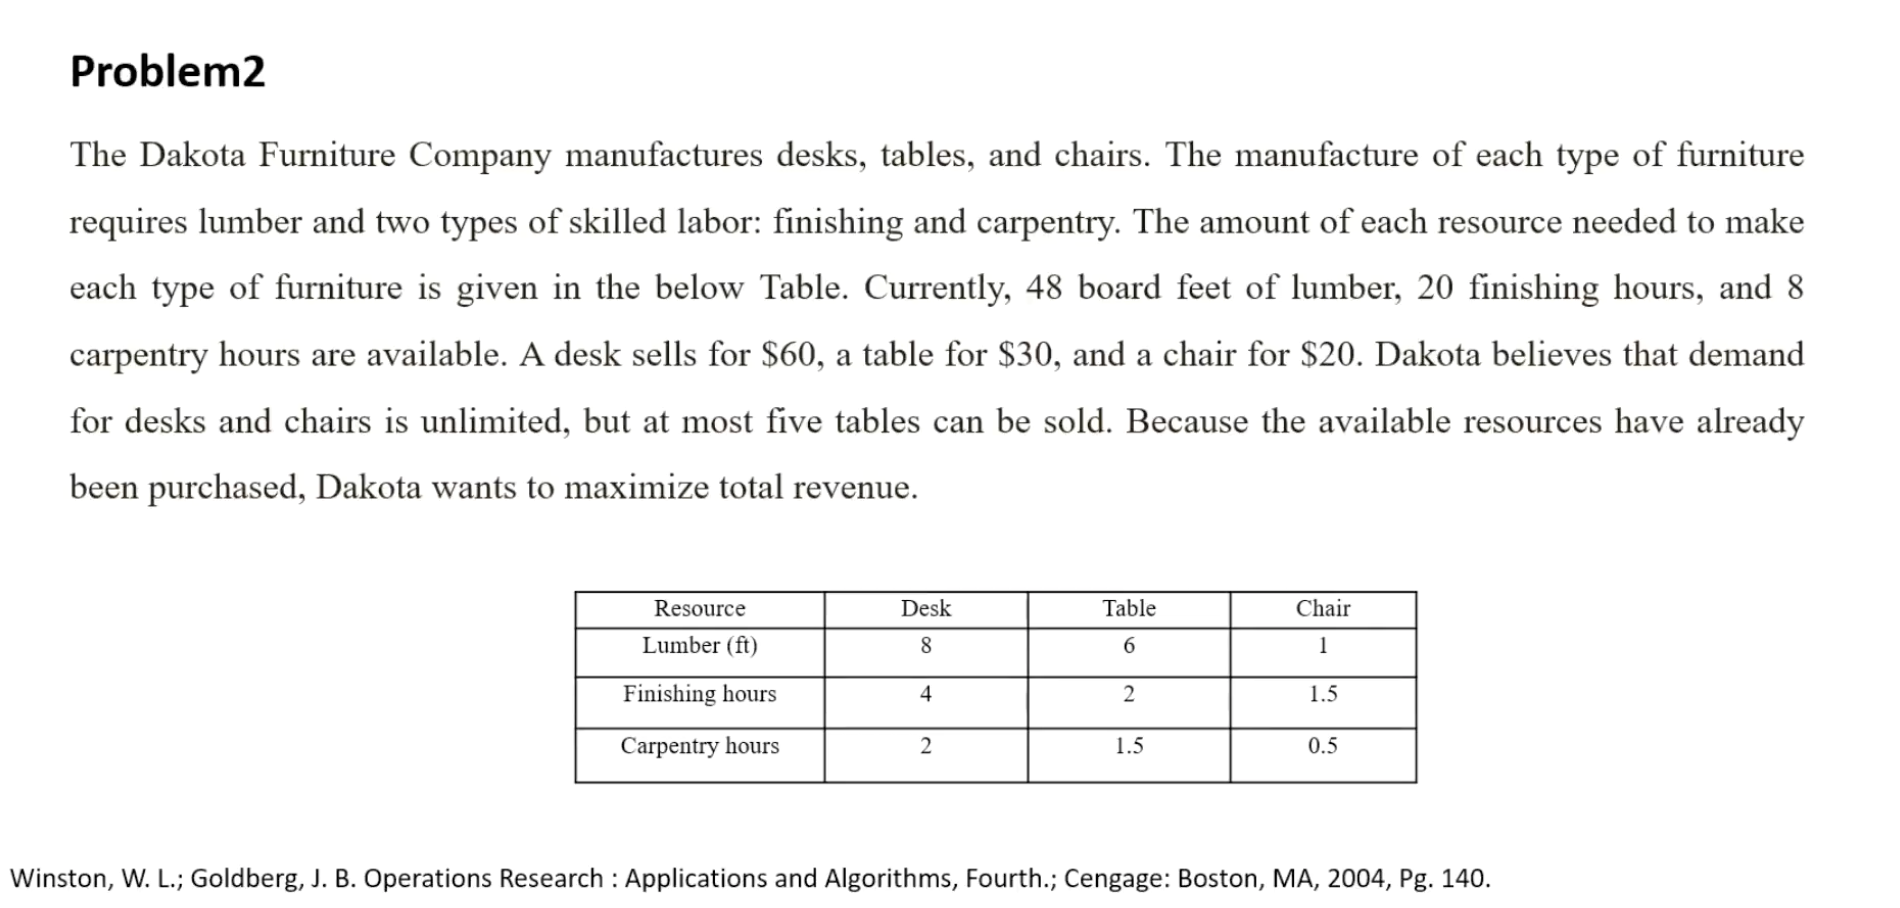

In [ ]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 24.3 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
P

In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [ ]:
model = pyo.ConcreteModel()

# Define sets
model.i = pyo.Set(initialize = ['Desk','Table','Chair'])

# Parameters
model.L = pyo.Param(model.i, initialize={'Desk':8,'Table':6, 'Chair':1})
L = model.L
model.F = pyo.Param(model.i, initialize={'Desk':4,'Table':2, 'Chair':1.5})
F = model.F
model.C = pyo.Param(model.i, initialize={'Desk':2,'Table':1.5, 'Chair':0.5})
C = model.C 
model.P = pyo.Param(model.i, initialize={'Desk':60,'Table':30, 'Chair':20})
P = model.P

# Decision Variable
model.x = pyo.Var(model.i, within=pyo.NonNegativeIntegers)
x = model.x

# Objective Function
def objective_function(model):
  return sum(x[i]*P[i] for i in model.i)
model.Obj = pyo.Objective(rule=objective_function, sense=pyo.maximize)

# Constrains
def cons1(model,i):
  return sum(L[i]*x[i] for i in model.i)<=48
model.Cons1 = pyo.Constraint(rule=cons1)

def cons2(model,i):
  return sum(F[i]*x[i] for i in model.i)<=20
model.Cons2 = pyo.Constraint(rule=cons2)

def cons3(model,i):
  return sum(C[i]*x[i] for i in model.i)<=8
model.Cons3 = pyo.Constraint(rule=cons3)

def cons4(model,i):
  return x['Table']<=5

# Solve
Solve = SolverFactory('glpk')
results = Solve.solve(model)

print('Objective Function: ', model.Obj())
print('Cons 1: ', cons1(model,model.i))
print('Cons2: ', cons2(model, model.i))
print('Cons3: ', cons3(model, model.i))
print('Cons4: ', cons4(model, model.i))
for i in model.i:
  print('Number of', i, 'produced= ', x[i]())

Objective Function:  280.0
Cons 1:  8*x[Desk] + 6*x[Table] + x[Chair]  <=  48
Cons2:  4*x[Desk] + 2*x[Table] + 1.5*x[Chair]  <=  20
Cons3:  2*x[Desk] + 1.5*x[Table] + 0.5*x[Chair]  <=  8
Cons4:  x[Table]  <=  5
Number of Desk produced=  2.0
Number of Table produced=  0.0
Number of Chair produced=  8.0
